In [1]:
from nilearn import image, plotting
import numpy as np

## Roi File

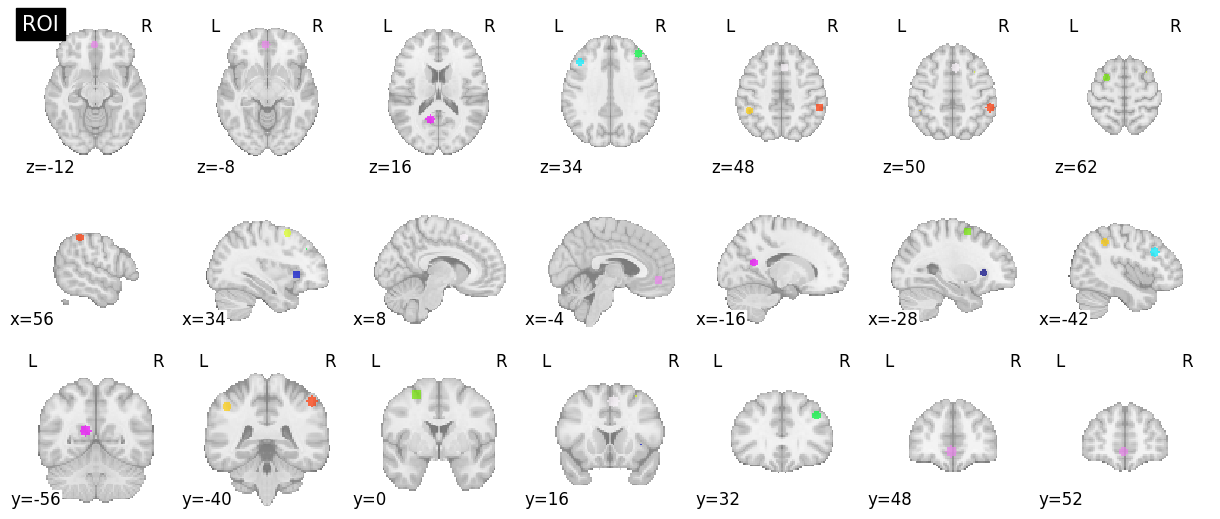

In [2]:
roi_file = "grantmask_labeled.nii"

plotting.plot_roi(roi_file, display_mode='mosaic',  title="ROI")

In [3]:
roi_mask_image = image.load_img(roi_file)

roi_mask_data = roi_mask_image.get_fdata()

print("ROI mask data shape: ", roi_mask_data.shape)

# find non-zero indices
roi_mask_indices = np.argwhere(roi_mask_data)

print("ROI mask indices shape: ", roi_mask_indices[0].shape)

roi_mask_indices

ROI mask data shape:  (91, 109, 91)
ROI mask indices shape:  (3,)


array([[16, 43, 61],
       [17, 41, 60],
       [17, 41, 61],
       ...,
       [70, 43, 58],
       [70, 43, 59],
       [71, 41, 58]])

## Test Masking a 4D image with a 3D mask (not registered)

/home/011/d/ds/dss210005/.conda/envs/fmri-pipeline/lib/python3.12/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



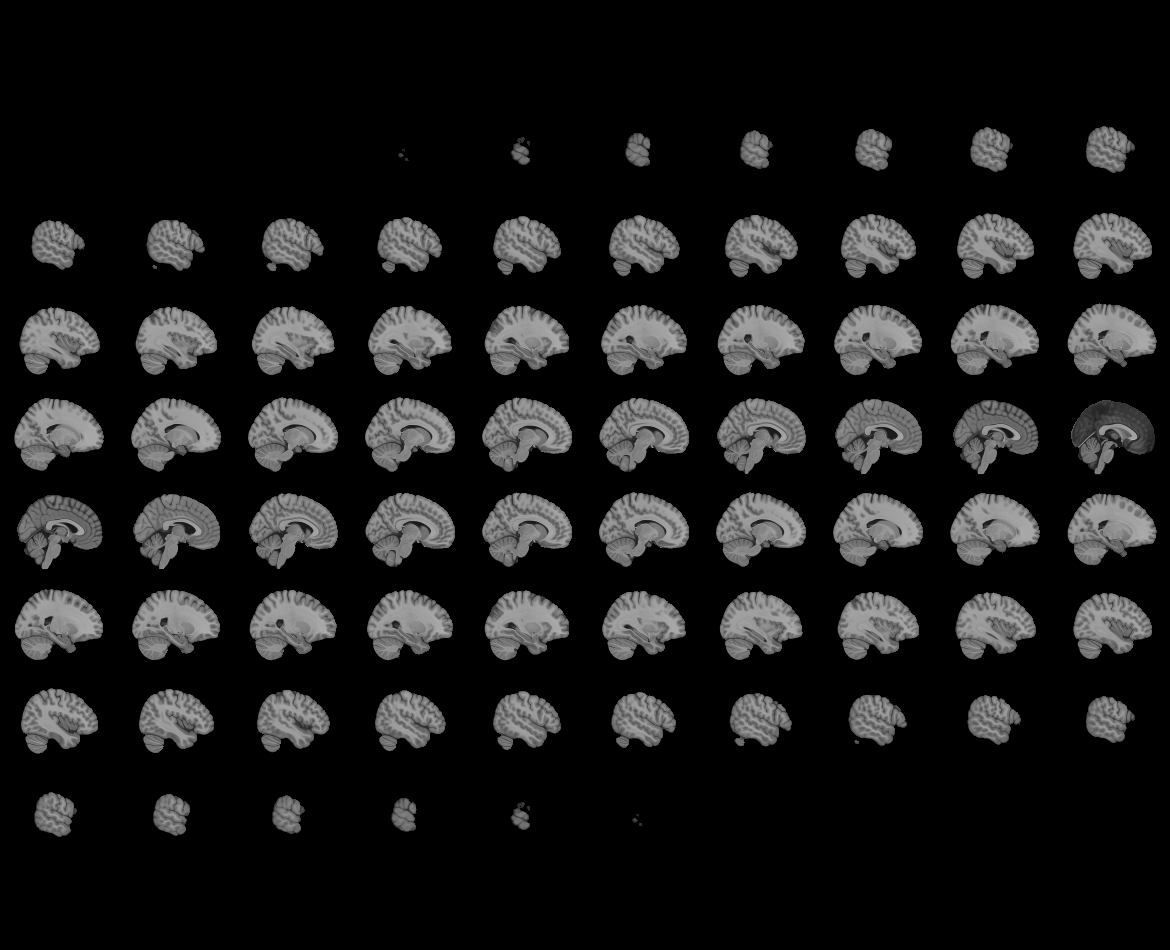
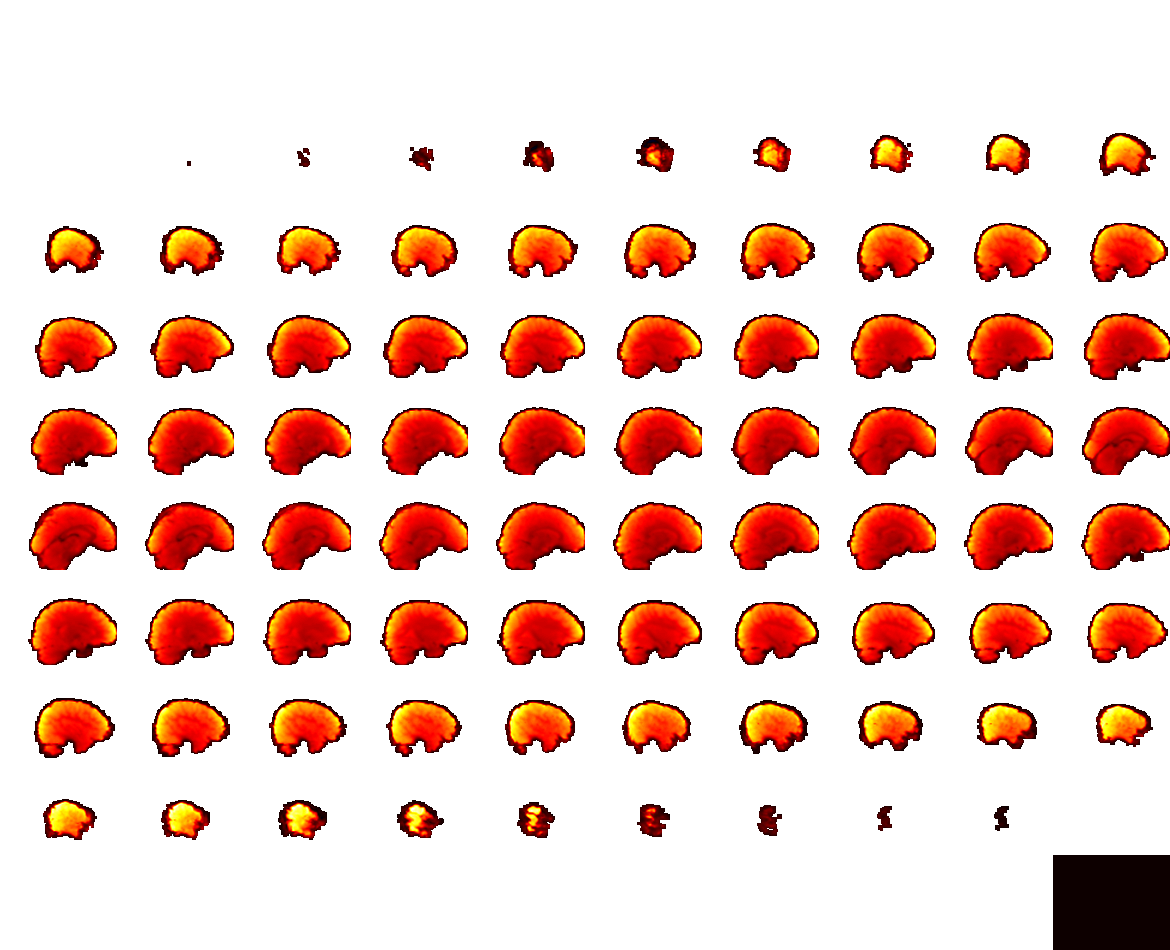

In [4]:
test_image_path = "/mnt/storage/daniel/feat-preprocess-datasink/sub-NDARINVZT44Y065_ses-baselineYear1Arm1_task-sst_run-01NL.feat/filtered_func_data.nii.gz"

test_image = image.load_img(test_image_path)

first_volume = image.index_img(test_image, 0)

plotting.view_img(first_volume, 
                title="Test filtered func")

## Check number of zfstat paths

In [5]:
import utils
import constants

feat_datasink = constants.INPUT_FEAT_DATASINK

nonlinear_zfstat_paths = utils.get_all_zfstat_paths_from_feat_datasink(feat_datasink, verbose=False, nonlinear_register=True)

print(f"Found {len(nonlinear_zfstat_paths)} nonlinear zfstat paths")

nonlinear_zfstat_paths[:5]

Found 3870 nonlinear zfstat paths


['/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat1_NL.nii.gz',
 '/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat2_NL.nii.gz',
 '/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat3_NL.nii.gz',
 '/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat4_NL.nii.gz',
 '/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat5_NL.nii.gz']

In [6]:
zfstat_paths, affine_files = utils.get_all_zfstat_paths_and_affine_files_from_feat_datasink(feat_datasink)

print(f"Found {len(zfstat_paths)} zfstat paths and {len(affine_files)} affine files")

for i in range(0, 10):
    shortened_zfstat_path = zfstat_paths[i].split("/")    
    shortened_zfstat_path = "/".join(shortened_zfstat_path[6:])
    
    shortened_affine_path = affine_files[i].split("/")    
    shortened_affine_path = "/".join(shortened_affine_path[6:])
    
    print(f"{shortened_zfstat_path} -> {shortened_affine_path}")

Found 3870 zfstat paths and 3870 affine files
sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat1.nii.gz -> sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/reg/example_func2standard.mat
sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat2.nii.gz -> sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/reg/example_func2standard.mat
sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat3.nii.gz -> sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/reg/example_func2standard.mat
sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat4.nii.gz -> sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/reg/example_func2standard.mat
sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat5.nii.gz -> sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/reg/example_func2standard.mat
sub-NDARINVY6FE3R8A_ses-baselineYe

In [7]:
from importlib import reload
import utils
reload(utils)
import utils

## Check Registration

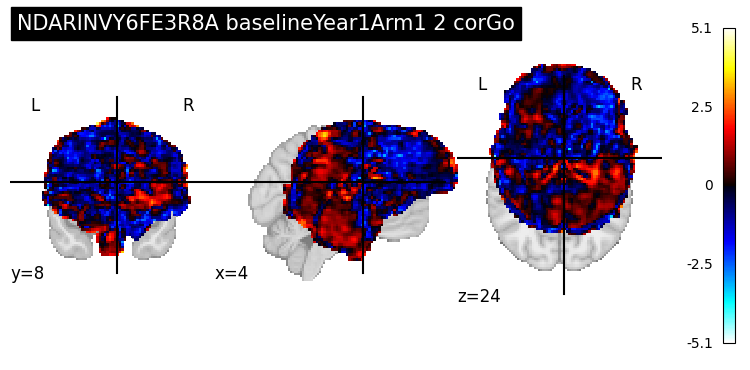

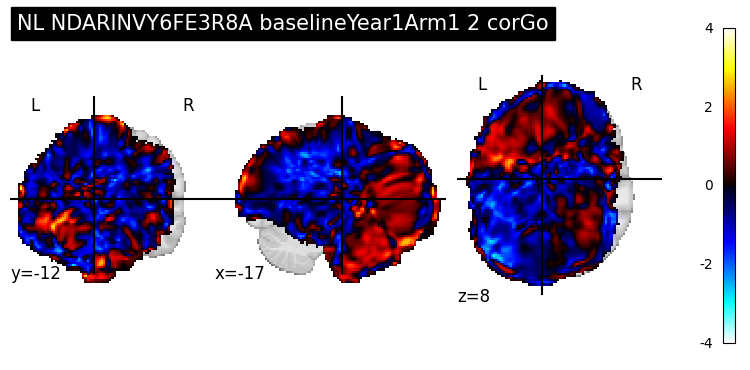

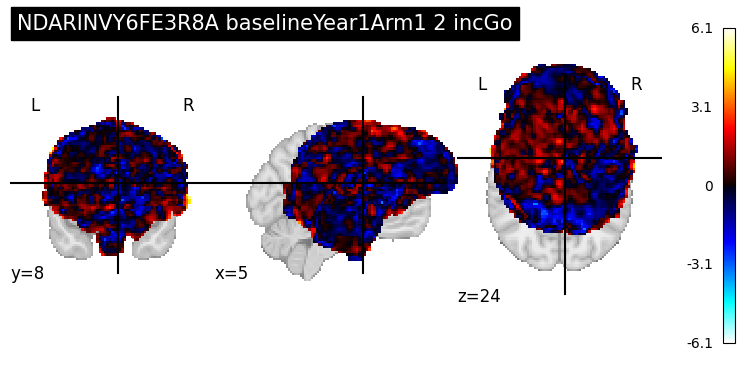

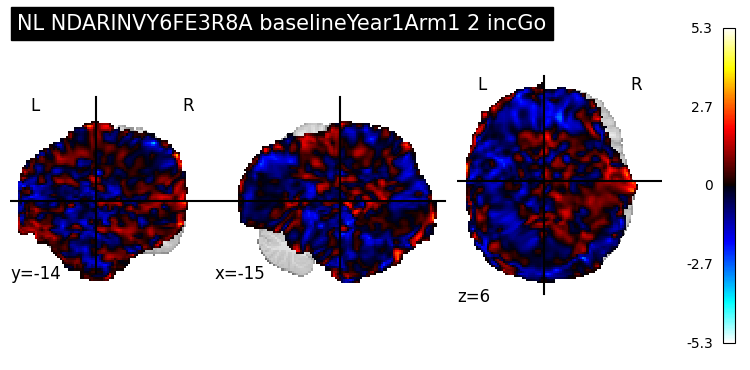

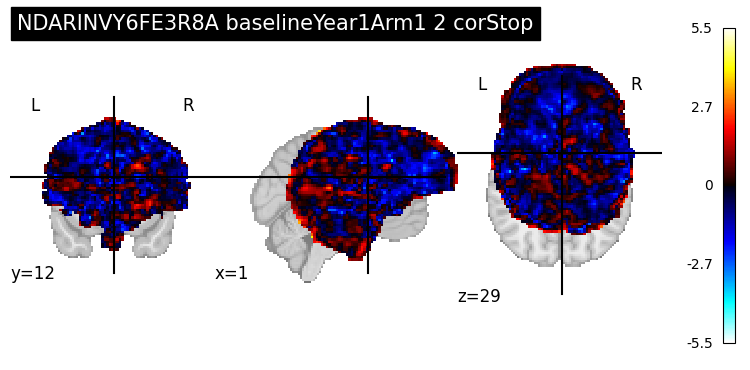

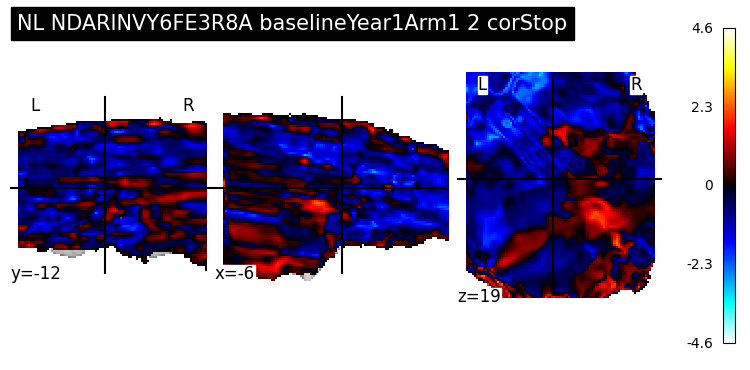

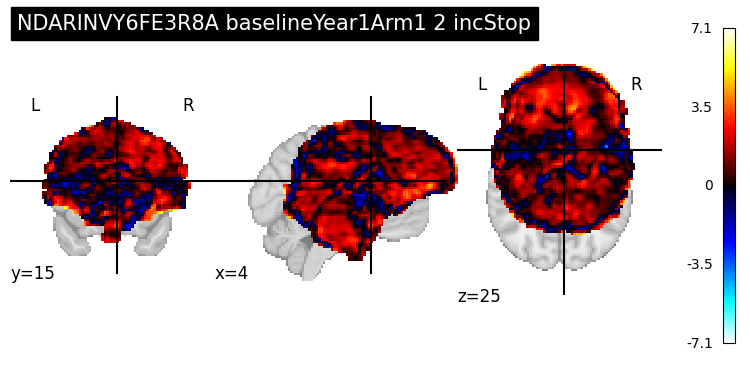

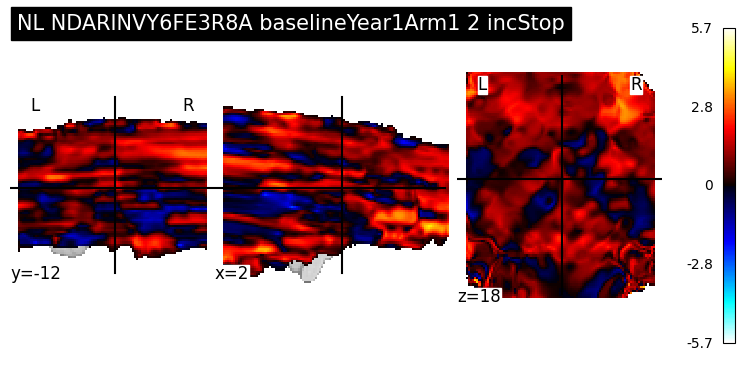

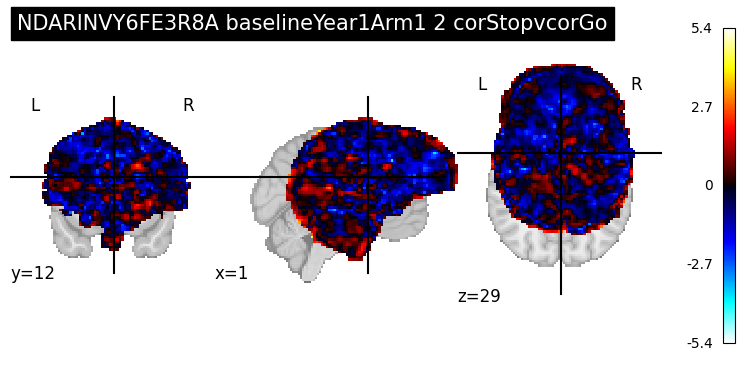

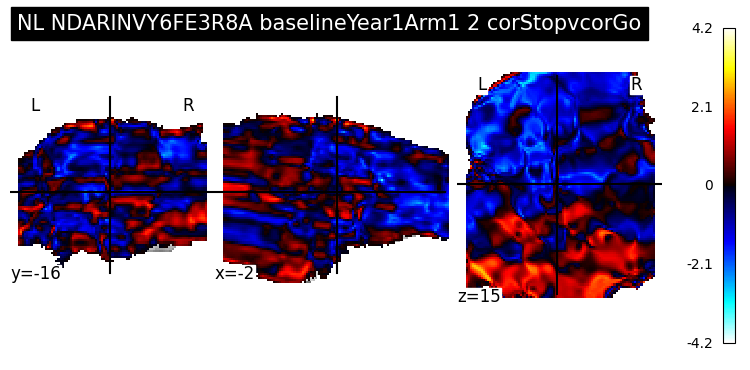

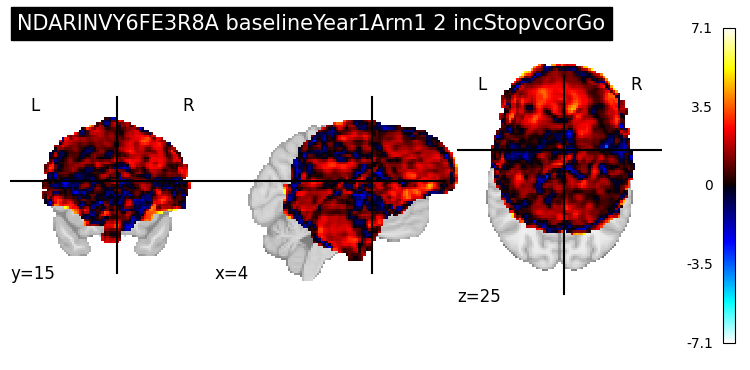

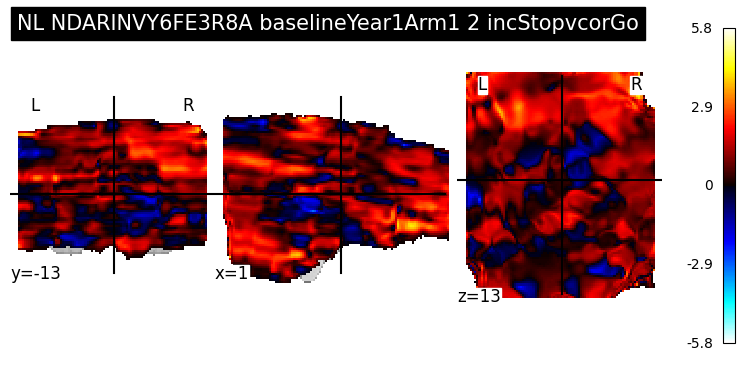

In [16]:
# index = 3000

# zfstat_image = image.load_img(nonlinear_zfstat_paths[index])

# plotting.view_img(zfstat_image, title=f"Nonlinear zfstat {index}")
import regex as re


for index in range(0, 6):
    subject_id = utils.get_subject_id_from_zfstat_path(nonlinear_zfstat_paths[index])
    run = utils.get_run_from_zfstat_path(nonlinear_zfstat_paths[index])
    image_name = utils.get_image_name_from_zfstat_path(nonlinear_zfstat_paths[index])
    session = utils.get_session_from_zfstat_path(nonlinear_zfstat_paths[index])
        
    
    normal_zfstat_image = image.load_img(zfstat_paths[index])        
    zfstat_image = image.load_img(nonlinear_zfstat_paths[index])                
    
    
    plotting.plot_stat_map(normal_zfstat_image, display_mode='ortho',  title=f"{subject_id} {session} {run} {image_name}")
    
    plotting.plot_stat_map(zfstat_image, display_mode='ortho',  title=f"NL {subject_id} {session} {run} {image_name}")

# plotting.plot_stat_map(zfstat_image, display_mode='mosaic',  title=f"Nonlinear zfstat {index}")

## Checking Registrations

In [9]:
mni_image = image.load_img(constants.MNI_TEMPLATE)

print(f"MNI image shape: {mni_image.shape}")

mni_image_data = mni_image.get_fdata()

def check_registration_quality_mni(registered_image_path: str) -> bool:
    # Load the registered image and MNI template
    registered_image = image.load_img(registered_image_path)    

    # Get the data from the images
    registered_image_data = registered_image.get_fdata()    

    # Check for non-zero values outside the MNI template
    outside_mask = (mni_image_data == 0) & (registered_image_data != 0)

    is_any_outside = np.any(outside_mask)

    print(f"Non-zero values outside the MNI template: {is_any_outside}")

    if np.any(outside_mask):
        print(f"Warning: Non-zero values found outside the MNI template for {registered_image_path}")
        return False
    else:
        print(f"Registration quality is good for {registered_image_path}")
        return True

# Test the function
res = check_registration_quality_mni(nonlinear_zfstat_paths[2])
print(f"zfstat_paths[0]: {nonlinear_zfstat_paths[0]} -> {res}")              

MNI image shape: (91, 109, 91)
Non-zero values outside the MNI template: True
zfstat_paths[0]: /mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat1_NL.nii.gz -> False


## Sanity Checks for ROI Activations CSV File

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np

In [11]:
test_df = pd.read_csv('testdatasink/roi_csv/roi_activations.csv')

test_df.head()

# rename 'avg' column to 'activation'
test_df.rename(columns={'avg': 'activation'}, inplace=True)

# change all values in activation column to be random values between -10 and 10
test_df['activation'] = np.random.uniform(-10, 10, test_df.shape[0])

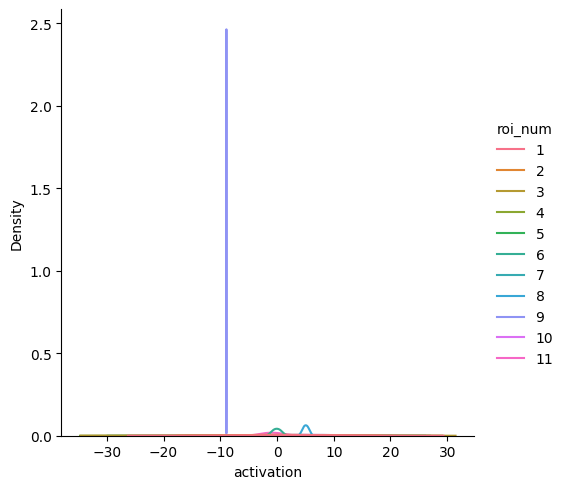

In [12]:
sns.displot(test_df.astype({"roi_num":"category"}), x="activation", hue="roi_num", kind="kde")

### Real roi activations file

In [13]:
roi_activations_df = pd.read_csv("/mnt/storage/daniel/roi-datasink/roi_csv/roi_activations.csv")